#Lógica difusa

Mamdani

https://pythonhosted.org/scikit-fuzzy/



###  1. Un sistema de inferencia difuso con una sola entrada y una única salida se describe mediante las siguientes reglas:
- SI 𝒙 ES pequeño ENTONCES 𝒚 es pequeño
- SI 𝒙 ES mediano ENTONCES 𝒚 es mediano
- SI 𝒙 ES grande ENTONCES 𝒚 es grande

Las variables lingüísticas de la entrada se definen mediante funciones trapezoidales:
- 𝜇𝑝𝑒𝑞𝑢𝑒ñ𝑜(𝑥) = 𝑡𝑟𝑎𝑝𝑚𝑓(𝑥,[-20, -15, -6, -3])
- 𝜇𝑚𝑒𝑑𝑖𝑎𝑛𝑜(𝑥) = 𝑡𝑟𝑎𝑝𝑚𝑓(𝑥,[-6, -3,3,6])
- 𝜇𝑔𝑟𝑎𝑛𝑑𝑒(𝑥) = 𝑡𝑟𝑎𝑝𝑚𝑓(𝑥,[3,6,15,20])

Las variables lingüísticas de la salida son:
- 𝜇𝑝𝑒𝑞𝑢𝑒ñ𝑜(𝑦) = 𝑡𝑟𝑎𝑝𝑚𝑓(𝑦,[-2.46, -1.46,1.46,2.46])
- 𝜇𝑚𝑒𝑑𝑖𝑎𝑛𝑜(𝑦) = 𝑡𝑟𝑎𝑝𝑚𝑓(𝑦,[1.46,2.46,5,7])
- 𝜇𝑔𝑟𝑎𝑛𝑑𝑒(𝑦) = 𝑡𝑟𝑎𝑝𝑚𝑓(𝑦,[5,7,13,15])

Observar que entrada y salida se definen sobre universos diferentes.

Calcular por el método de centroide la salida a las entradas x = 8, -5, 5, 8.

### 3. Diseñar un Sistema Inteligente de Control de Tránsito para un cruce peatonal en una autopista.

Puede considerar como variables de entrada el flujo del tránsito sobre la autopista (cantidad de autos por minuto) y la

densidad de peatones que esperan en el cruce (peatones por metro cuadrado), o agregar las que considere importantes.

Las salidas son los tiempos en que los semáforos se mantienen en luz verde o en luz roja. Establecer conjuntos difusos para
las variables, determinar las reglas que controlarán el sistema. Observar y comentar los resultados obtenidos.

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#recommended-use

" x baja " --> Antecedente
entonces
" y alta " --> Consecuente

x --> variable antecedente
y --> variable consecuente

x_s --> funcion de verdad de antecedente x es pequenio. 
y_s --> funcion de verdad de consecuente y es pequenio. 

act_x_s --> valor que toma en y un valor de entrada dado, en x_s

gmp_y_s --> gmp means generalized modus ponen, gmp resultante de la funcion consecuente y_s

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
x = np.arange(-15,16,1) #no queiro la parte del trapecio que decae
y = np.arange(-1.46,13,.1)

In [32]:
#funciones de pertenencia

# in functions (antecedente)
x_s = fuzz.trapmf(x,[-20, -15, -6, -3])
x_m = fuzz.trapmf(x,[-6, -3,3,6])
x_b = fuzz.trapmf(x,[3,6,15,20])

#out functions (precedente)
y_s = fuzz.trapmf(y,[-2.46, -1.46,1.46,2.46])
y_m = fuzz.trapmf(y,[1.46,2.46,5,7])
y_b = fuzz.trapmf(y,[5,7,13,15])

0.43333333333333324

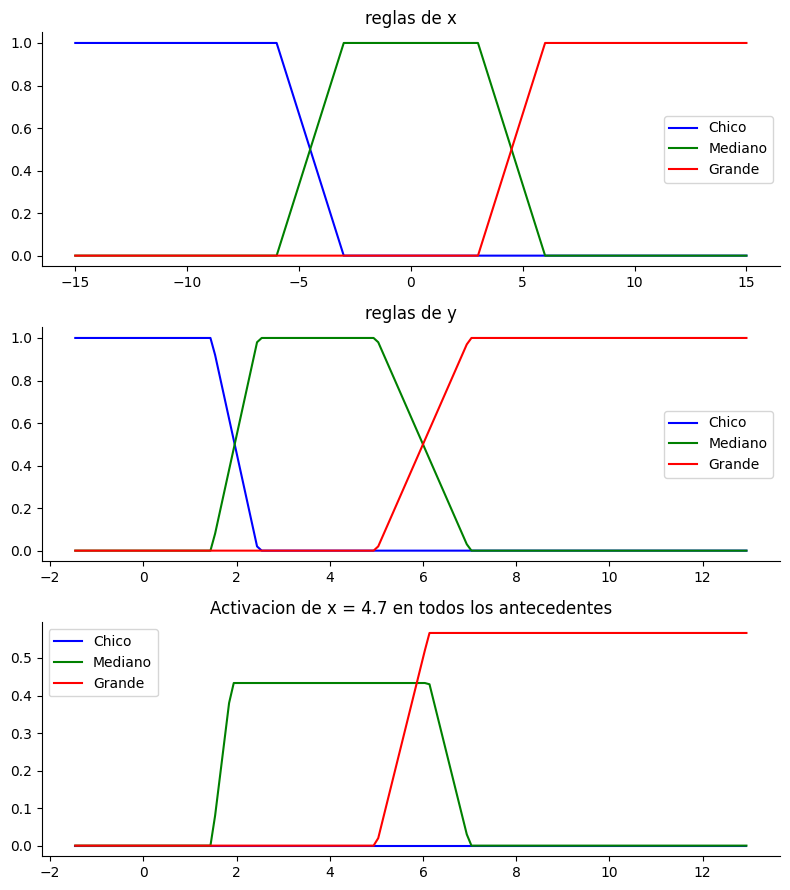

In [38]:
 entrada = 4.7
 act_x_s = fuzz.interp_membership(x, x_s, entrada)
 act_x_m = fuzz.interp_membership(x, x_m, entrada)
 act_x_b = fuzz.interp_membership(x, x_b, entrada)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x, x_s, 'b', linewidth=1.5, label='Chico')
ax0.plot(x, x_m, 'g', linewidth=1.5, label='Mediano')
ax0.plot(x, x_b, 'r', linewidth=1.5, label='Grande')
ax0.set_title('reglas de x')
ax0.legend()

ax1.plot(y, y_s, 'b', linewidth=1.5, label='Chico')
ax1.plot(y, y_m, 'g', linewidth=1.5, label='Mediano')
ax1.plot(y, y_b, 'r', linewidth=1.5, label='Grande')
ax1.set_title('reglas de y')
ax1.legend()

'''
- SI 𝒙 ES pequeño ENTONCES 𝒚 es pequeño
- SI 𝒙 ES mediano ENTONCES 𝒚 es mediano
- SI 𝒙 ES grande ENTONCES 𝒚 es grande
'''
gmp_y_s = np.fmin(act_x_s, y_s)
gmp_y_m = np.fmin(act_x_m, y_m)
gmp_y_b = np.fmin(act_x_b, y_b)

ax2.plot(y, gmp_y_s, 'b', linewidth=1.5, label='Chico')
ax2.plot(y, gmp_y_m, 'g', linewidth=1.5, label='Mediano')
ax2.plot(y, gmp_y_b, 'r', linewidth=1.5, label='Grande')
ax2.set_title(f'Activacion de x = {entrada} en todos los antecedentes')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

'Estimated y: 7.652467945037698'

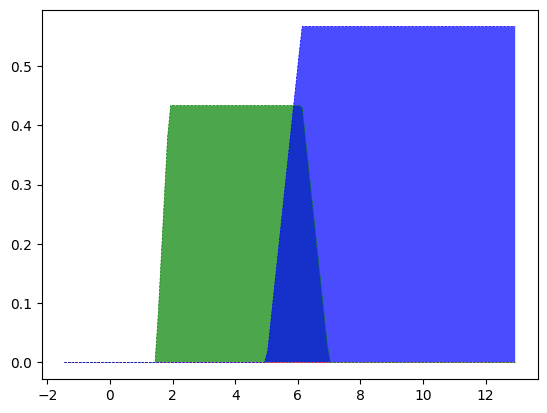

In [42]:
piso = np.zeros_like(y)

plt.fill_between(y, gmp_y_s, piso, facecolor='r', alpha=0.7)
plt.plot(y, gmp_y_s, 'r', linewidth=0.5, linestyle='--')
plt.fill_between(y, gmp_y_m, piso, facecolor='g', alpha=0.7)
plt.plot(y, gmp_y_m, 'g', linewidth=0.5, linestyle='--')
plt.fill_between(y, gmp_y_b, piso, facecolor='b', alpha=0.7)
plt.plot(y, gmp_y_b, 'b', linewidth=0.5, linestyle='--')

agregacion = np.fmax(gmp_y_s,np.fmax(gmp_y_m, gmp_y_b)) 

y = fuzz.defuzz(y, act_y, 'centroid')
f'Estimated y: {tip}'